In [67]:
import sys
from pathlib import Path
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [58]:
project_dir = '../'
with open(os.path.join(project_dir, 'reports/data/simon_36/EEGNet_SSVEP.pkl'), 'rb') as f:
    history = pickle.load(f)

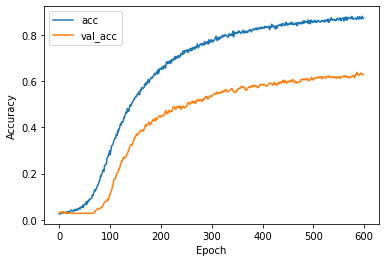

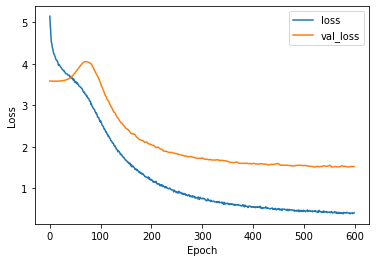

In [62]:
epoch_start = 0

plt.figure()
capsize= 5
mean_acc = np.array(history['acc']).mean(axis=0)
std_acc = np.array(history['acc']).std(axis=0)
val_mean_acc = np.array(history['val_acc']).mean(axis=0)
val_std_acc = np.array(history['val_acc']).std(axis=0)
xticks = np.arange(epoch_start, len(mean_acc), 1)
plt.errorbar(xticks, mean_acc[epoch_start:], label='acc', capsize=capsize)
plt.errorbar(xticks, val_mean_acc[epoch_start:], label='val_acc', capsize=capsize)
# plt.xticks(xticks)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
capsize= 5
mean_loss = np.array(history['loss']).mean(axis=0)
std_loss = np.array(history['loss']).std(axis=0)
val_mean_loss = np.array(history['val_loss']).mean(axis=0)
val_std_loss = np.array(history['val_loss']).std(axis=0)
xticks = np.arange(epoch_start, len(mean_loss), 1)
plt.errorbar(xticks, mean_loss[epoch_start:], label='loss', capsize=capsize)
plt.errorbar(xticks, val_mean_loss[epoch_start:], label='val_loss', capsize=capsize)
# plt.xticks(xticks)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

Use the maximum accuracy from all epochs as final accuracy

,0
count,10.000000
mean,0.651389
std,0.108070
min,0.416667
25%,0.625000
50%,0.687500
75%,0.718750
max,0.763889


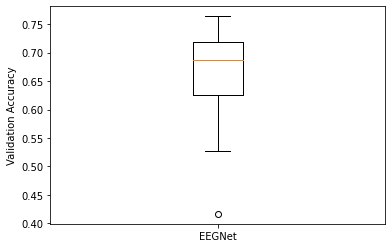

In [70]:
eegnet_val_accs = np.max(history['val_acc'], axis=1)
f, ax = plt.subplots()
ax.boxplot([eegnet_val_accs])
ax.set_xticklabels(['EEGNet'])
ax.set_ylabel('Validation Accuracy');
pd.DataFrame(eegnet_val_accs).describe()